Resolver a Integral a seguir pelo Método da Integração de Monte Carlo e pelo Método da Integração por Importância.

$$ I = \int_{0}^{\infty}\ x(x^2+1)^{-2}\ dx$$


Importando as bibliotecas necessárias:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

O Gráfico da função $f(x)=x(x^2+1)^{-2}=\frac{x}{(x^2+1)^2}$ é apresentado na Figura a seguir:

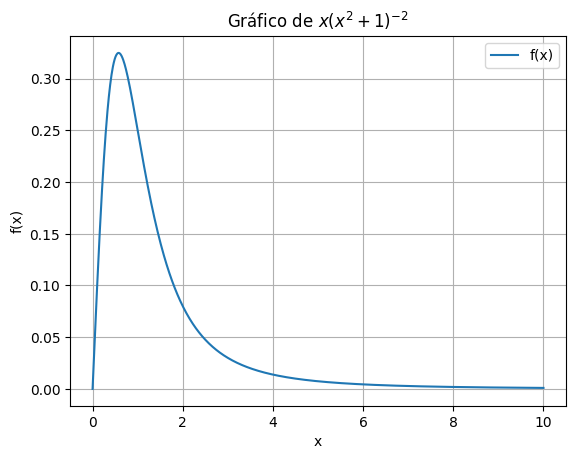

In [ ]:
x = np.linspace(0, 10, 1000)
y = x/(x**2 + 1)**2

print('\n')
plt.plot(x, y, label='f(x)')
plt.xlabel('x'); plt.ylabel('f(x)')
plt.title('Gráfico de $x(x^2 + 1)^{-2}$')
plt.grid(True); plt.legend(); plt.show()


Para calcular a Integral, é definida uma função $g(x)$ tal que

$$\int_{a}^{b}\ g(x)\ dx = 1$$ $$$$

Observado o comportamento de cauda longa da função $f(x)$, foi escolhida a função $g(x)=A\cdot e^{-x}$, com $A=1$.

$$\int_{0}^{\infty}\ A\cdot e^{-x}\ dx = 1\ \therefore\ \mathbf{A=1}$$ $$$$

É realizada a seguinte modificação:

$$I=\int_{a}^{b}\ f(x)\ dx = \int_{a}^{b}\ f(x)\cdot\frac{g(x)}{g(x)}\ dx = E_g\left[\frac{f(x)}{g(x)}\right]$$ $$$$

Para gerar amostras para $g(x)$, o Método da Inversa considera a Função de Distribuição Cumulativa de $x$:

$$F_X(x)=\int_{0}^{x}\ e^{-t}\ dt\ \therefore\ \mathbf{F_X(x) = 1-e^{-x}}$$

$$U = 1 - e^{-x} \rightarrow\ e^{-x} = 1 - U$$ $$$$

Para a Inversa da Função de Distribuição Cumulativa de  x:

$$ln(e^{-x}) = ln(1-U)\ \therefore\ x = -ln(1-U)$$
$$$$

---



Inicialização da quantidade de amostras:

In [ ]:
N = 100000
u_Importancia = np.random.uniform(0, 1, N)
u_MonteCarlo = np.random.rand(N)

Definindo valores de $x$ e calculando a Integral pelo Método de Monte Carlo:

In [ ]:
x = -np.log(1 - u_MonteCarlo)
integral = np.sum(x*pow(x**2 + 1, -2)/np.exp(-x))/N
print(f'O resultado da integral pelo Método de Monte Carlo é {integral:.4f}')

O resultado da integral pelo Método de Monte Carlo é 0.4977


Pelo Método da Integração por Importância:

In [ ]:
x = -np.log(1 - u_Importancia)
integral = np.sum(x*pow(x**2 + 1, -2)/np.exp(-x))/N
print(f'O resultado da integral pelo Método de Importância é {integral:.4f}')

O resultado da integral pelo Método de Importância é 0.4956


Plotando o Gráfico com a função e a área em destaque sendo a Integral calculada considerando o Método da Integração por Importância:

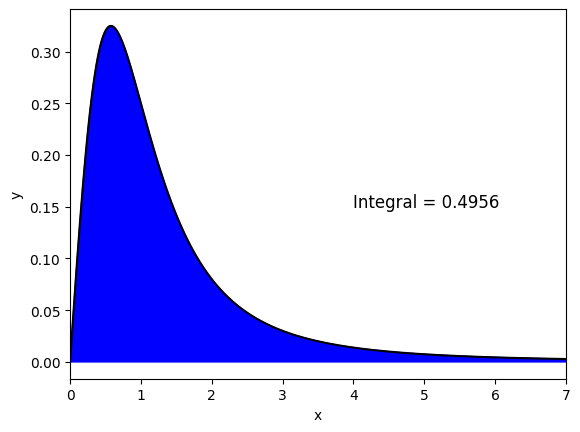

In [ ]:
print('\n')
x = np.linspace(0, 1000, N)
y = x/(x**2 + 1)**2

plt.plot(x, y, color='black')
plt.fill_between(x, y, color='blue')
plt.xlim(0, 7); plt.xlabel('x'), plt.ylabel('y')
plt.text(4, 0.15, f'Integral = {integral:.4f}', fontsize=12, color='black')

plt.show()
